# Linear Regression

Linear regression quantifies the relationship between one or more predictor variable and one outcome variable. 

It can be interpreted with the equation
y = mx + c

where,
y => Dependent variable
x => Independent vaianle
m => Slope (constant)
c => Intercept (constant)

### 1. Data Exporation

In [59]:
#Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
#Importing the dataset

df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [37]:
#Checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [38]:
# Stats Check

df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### 2. Exploratory Data Analysis

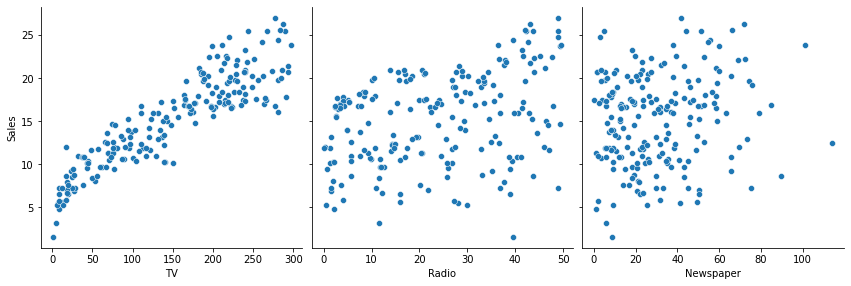

In [39]:
# Plotting the data wrt the dependent variable### 1. Data Exporation

a=list(df.columns)
a.remove('Sales')

sns.pairplot(data=df, x_vars=a,y_vars='Sales', height=4)
plt.show()

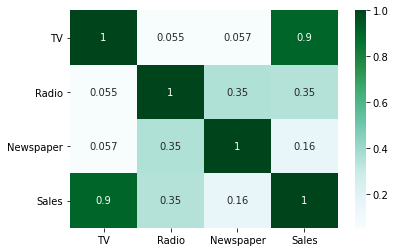

In [40]:
# Correlation Check

sns.heatmap(df.corr(), annot=True, cmap='BuGn')
plt.show()

### 3. ML Model Development

In [64]:
#Splitting Training & Testing sets

#X = df[a]
X = df.TV
y = df.Sales

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train_sm=sm.add_constant(X_train)
X_train_sm

#ML Model

LR = sm.OLS(y_train,X_train_sm).fit()
LR.summary()

(150,) (50,) (150,) (50,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     612.6
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           1.81e-54
Time:                        19:22:49   Log-Likelihood:                -329.06
No. Observations:                 150   AIC:                             662.1
Df Residuals:                     148   BIC:                             668.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0227      0.369     19.030      0.000       6.293       7.752
TV             0.0543      0.002     24.751      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.171
Skew:                           0.083   Prob(JB):                        0.918
Kurtosis:                       2.997   Cond. No.                         348.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

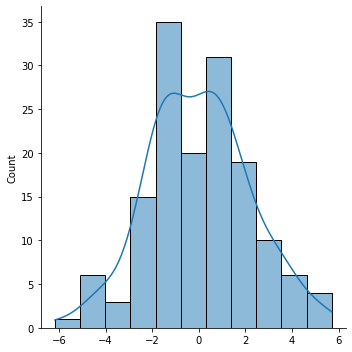

In [44]:
# Resiual Check

res = y_train - (LR.params[0]+(LR.params[1]*X_train))
sns.displot(res, kde=True)
plt.show()

### 4. Predictiing & Evaluating the Model

In [65]:
#R2_Score and RMSE on Train Data
print("R2 Score ",r2_score(y_train,LR.predict(sm.add_constant(X_train))))
print("RMSE ",np.sqrt(mean_squared_error(y_train,LR.predict(sm.add_constant(X_train)))))
print('-'*100)

#Predicting Test set
P = LR.predict(sm.add_constant(X_test))

#R2_Score and RMSE on Test Data
print("R2 Score ",r2_score(y_test,P))
print("RMSE ",np.sqrt(mean_squared_error(y_test,P)))

R2 Score  0.8054141204806966
RMSE  2.1701399060956836
----------------------------------------------------------------------------------------------------
R2 Score  0.8218506182225036
RMSE  2.614204952311897


### 5. Alternate Method (Using Sklearn Package)

In [75]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)
P = LR.predict(X_test.values.reshape(-1,1))

#R2_Score and RMSE on Train Data
print("R2 Score ",r2_score(y_train,LR.predict(X_train.values.reshape(-1,1))))
print("RMSE ",np.sqrt(mean_squared_error(y_train,LR.predict(X_train.values.reshape(-1,1)))))
print('-'*100)

#R2_Score and RMSE on Test Data
print("R2 Score ",r2_score(y_test,P))
print("RMSE ",np.sqrt(mean_squared_error(y_test,P)))



R2 Score  0.8054141204806966
RMSE  2.1701399060956836
----------------------------------------------------------------------------------------------------
R2 Score  0.8218506182225036
RMSE  2.6142049523118978


<<<-----------------------------THE END----------------------------------->>>